🧩 PART 1: Animated Evolution of the Network

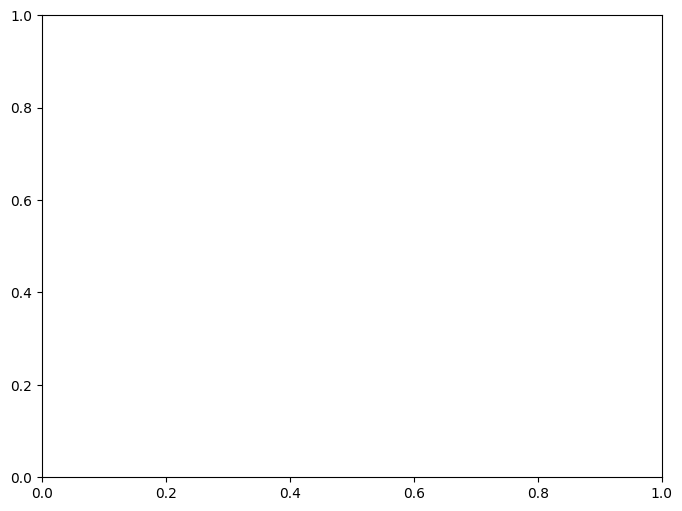

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create empty graph and edge stream
G = nx.Graph()
edge_sequence = [
    ("Alice", "Bob"), ("Alice", "Charlie"), ("Bob", "David"),
    ("Charlie", "Eve"), ("David", "Eve"), ("Eve", "Frank"),
    ("George", "Helen"), ("Helen", "Ivy"), ("George", "Ivy"),
    ("Alice", "George"), ("David", "Helen"), ("Frank", "Jack"),
    ("Jack", "Karen"), ("Karen", "Leo"), ("Leo", "Mona"),
    ("Mona", "Nate"), ("Nate", "Olivia"), ("Olivia", "Paul"),
    ("Paul", "Quincy"), ("Quincy", "Rachel"), ("Rachel", "Sam"),
    ("Sam", "Tina"), ("Tina", "Uma"), ("Uma", "Victor"),
    ("Victor", "Wendy"), ("Wendy", "Xander"), ("Xander", "Yara"),
    ("Yara", "Zane"), ("Zane", "Alice"), ("Frank", "George"),
    ("Karen", "Helen"), ("Mona", "Eve"), ("Nate", "David"),
    ("Olivia", "Charlie"), ("Paul", "Bob"), ("Quincy", "Charlie"),
    ("Rachel", "Eve"), ("Sam", "Frank"), ("Tina", "George"),
    ("Uma", "Helen"), ("Victor", "Ivy"), ("Wendy", "Jack"),
    ("Xander", "Karen"), ("Yara", "Leo"), ("Zane", "Mona")
]

fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(nx.Graph(edge_sequence), seed=42)

def update(frame):
    ax.clear()
    current_edges = edge_sequence[:frame+1]
    G.clear()
    G.add_edges_from(current_edges)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=800, ax=ax)
    ax.set_title(f"Step {frame + 1}: Network Evolution")

ani = animation.FuncAnimation(fig, update, frames=len(edge_sequence), interval=1000, repeat=False)
plt.show()

In [ ]:
ani.save('network_evolution.gif', writer='pillow')

🌐 PART 2: Interactive Dashboard with Plotly Dash

In [ ]:
!pip install dash dash-cytoscape networkx pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.1 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=4010717 sha256=d9c9e362c32909f4af105008fca126e8e7a38e6dc04988e886dcb96755062a8a
  Stored in directory: /root/.cache/pip/wheels/99/b1/ab/6c999ab288b4849d372e23c0a8f6ece7edb7ffeb8c97959ab0
Successfully built dash-cytoscape
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash
import dash_cytoscape as cyto
from dash import html, dcc, Input, Output
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the sequence of edges to add
edge_sequence = [
    ("Alice", "Bob"), ("Alice", "Charlie"), ("Bob", "David"),
    ("Charlie", "Eve"), ("David", "Eve"), ("Eve", "Frank"),
    ("George", "Helen"), ("Helen", "Ivy"), ("George", "Ivy"),
    ("Alice", "George"), ("David", "Helen"), ("Frank", "Jack"),
    ("Jack", "Karen"), ("Karen", "Leo"), ("Leo", "Mona"),
    ("Mona", "Nate"), ("Nate", "Olivia"), ("Olivia", "Paul"),
    ("Paul", "Quincy"), ("Quincy", "Rachel"), ("Rachel", "Sam"),
    ("Sam", "Tina"), ("Tina", "Uma"), ("Uma", "Victor"),
    ("Victor", "Wendy"), ("Wendy", "Xander"), ("Xander", "Yara"),
    ("Yara", "Zane"), ("Zane", "Alice"), ("Frank", "George"),
    ("Karen", "Helen"), ("Mona", "Eve"), ("Nate", "David"),
    ("Olivia", "Charlie"), ("Paul", "Bob"), ("Quincy", "Charlie"),
    ("Rachel", "Eve"), ("Sam", "Frank"), ("Tina", "George"),
    ("Uma", "Helen"), ("Victor", "Ivy"), ("Wendy", "Jack"),
    ("Xander", "Karen"), ("Yara", "Leo"), ("Zane", "Mona")
]

# Generate a list of colors for communities
def generate_community_colors(num_communities):
    colors = list(mcolors.TABLEAU_COLORS.values())
    if num_communities <= len(colors):
        return colors[:num_communities]
    else:
        # Extend the color list if needed
        extended_colors = colors * (num_communities // len(colors) + 1)
        return extended_colors[:num_communities]

# Function to create the network up to a certain step
def create_network(step):
    G = nx.Graph()
    G.add_edges_from(edge_sequence[:step])
    if G.number_of_nodes() == 0:
        return [], []
    partition = community_louvain.best_partition(G)
    degree_centrality = nx.degree_centrality(G)
    communities = set(partition.values())
    community_colors = generate_community_colors(len(communities))
    community_color_map = dict(zip(communities, community_colors))
    nodes = [
        {
            'data': {'id': node, 'label': node, 'centrality': f"{degree_centrality[node]:.2f}"},
            'style': {'background-color': community_color_map[partition[node]]}
        }
        for node in G.nodes()
    ]
    edges = [{'data': {'source': u, 'target': v}} for u, v in G.edges()]
    return nodes, edges

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Social Network Evolution"

# Initial network state
initial_nodes, initial_edges = create_network(1)

app.layout = html.Div([
    html.H2("Social Network Evolution Dashboard"),
    dcc.Slider(
        id='time-slider',
        min=1,
        max=len(edge_sequence),
        value=1,
        marks={i: f'Step {i}' for i in range(1, len(edge_sequence)+1)},
        step=1
    ),
    cyto.Cytoscape(
        id='network-graph',
        layout={'name': 'cose'},
        style={'width': '100%', 'height': '600px'},
        elements=initial_nodes + initial_edges,
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'label': 'data(label)',
                    'width': '40',
                    'height': '40',
                    'font-size': '12px',
                    'text-valign': 'center',
                    'color': 'white',
                    'text-outline-width': 2,
                    'text-outline-color': '#888'
                }
            },
            {
                'selector': 'edge',
                'style': {
                    'line-color': '#ccc',
                    'width': 2
                }
            }
        ]
    ),
    html.Div(id='node-info', style={'marginTop': '20px', 'fontSize': '16px'})
])

# Update network based on slider
@app.callback(
    Output('network-graph', 'elements'),
    Input('time-slider', 'value')
)
def update_network(step):
    nodes, edges = create_network(step)
    return nodes + edges

# Display node information on hover
@app.callback(
    Output('node-info', 'children'),
    Input('network-graph', 'mouseoverNodeData')
)
def display_node_info(data):
    if data:
        return f"Node: {data['label']} | Degree Centrality: {data['centrality']}"
    return "Hover over a node to see details."

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

# 📊 Centrality Measures:

We'll calculate various centrality metrics for each node in the network.

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(edge_sequence)

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# 🔎 Community Detection:

We'll use the Louvain method to detect communities within the network.

In [ ]:
import community as community_louvain

partition = community_louvain.best_partition(G)

# 🌟 Influential User Detection:

We'll identify the most influential users based on the calculated centrality measures.

In [ ]:
# Identify top 5 nodes for each centrality measure
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# ⚙️ Implementation:

In [ ]:
# filename: app.py
import dash
import dash_cytoscape as cyto
from dash import html, dcc, Input, Output
import networkx as nx
import community as community_louvain
import matplotlib.colors as mcolors

# ---------------------------
# Expanded Network Edge Sequence
# ---------------------------
edge_sequence = [
    ("Alice", "Bob"), ("Alice", "Charlie"), ("Bob", "David"),
    ("Charlie", "Eve"), ("David", "Eve"), ("Eve", "Frank"),
    ("George", "Helen"), ("Helen", "Ivy"), ("George", "Ivy"),
    ("Alice", "George"), ("David", "Helen"), ("Frank", "Jack"),
    ("Jack", "Karen"), ("Karen", "Leo"), ("Leo", "Mona"),
    ("Mona", "Nate"), ("Nate", "Olivia"), ("Olivia", "Paul"),
    ("Paul", "Quincy"), ("Quincy", "Rachel"), ("Rachel", "Sam"),
    ("Sam", "Tina"), ("Tina", "Uma"), ("Uma", "Victor"),
    ("Victor", "Wendy"), ("Wendy", "Xander"), ("Xander", "Yara"),
    ("Yara", "Zane"), ("Zane", "Alice"), ("Frank", "George"),
    ("Karen", "Helen"), ("Mona", "Eve"), ("Nate", "David"),
    ("Olivia", "Charlie"), ("Paul", "Bob"), ("Quincy", "Charlie"),
    ("Rachel", "Eve"), ("Sam", "Frank"), ("Tina", "George"),
    ("Uma", "Helen"), ("Victor", "Ivy"), ("Wendy", "Jack"),
    ("Xander", "Karen"), ("Yara", "Leo"), ("Zane", "Mona")
]

# ---------------------------
# Utility: Generate Colors for Communities
# ---------------------------
def generate_community_colors(num_communities):
    colors = list(mcolors.TABLEAU_COLORS.values())
    if num_communities <= len(colors):
        return colors[:num_communities]
    else:
        extended_colors = colors * (num_communities // len(colors) + 1)
        return extended_colors[:num_communities]

# ---------------------------
# Create Network for a Given Step (Slider Value)
# ---------------------------
def create_network(step):
    G = nx.Graph()
    G.add_edges_from(edge_sequence[:step])
    if G.number_of_nodes() == 0:
        return [], []

    # Calculate community partition using Louvain method
    partition = community_louvain.best_partition(G)

    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    # Map communities to colors
    communities = set(partition.values())
    community_colors = generate_community_colors(len(communities))
    community_color_map = dict(zip(communities, community_colors))

    # Create node elements with detailed info on centralities
    nodes = [
        {
            'data': {
                'id': node,
                'label': node,
                'degree': f"{degree_centrality[node]:.2f}",
                'closeness': f"{closeness_centrality[node]:.2f}",
                'betweenness': f"{betweenness_centrality[node]:.2f}",
                'eigenvector': f"{eigenvector_centrality[node]:.2f}"
            },
            'style': {'background-color': community_color_map[partition[node]]}
        }
        for node in G.nodes()
    ]

    # Create edge elements
    edges = [{'data': {'source': u, 'target': v}} for u, v in G.edges()]
    return nodes, edges

# ---------------------------
# Dash App Setup
# ---------------------------
app = dash.Dash(__name__)
app.title = "Enhanced Social Network Evolution Dashboard"

# Initialize network state for the first step
initial_nodes, initial_edges = create_network(1)

app.layout = html.Div([
    html.H2("Enhanced Social Network Evolution Dashboard"),

    dcc.Slider(
        id='time-slider',
        min=1,
        max=len(edge_sequence),
        value=1,
        marks={i: f'Step {i}' for i in range(1, len(edge_sequence)+1)},
        step=1,
        tooltip={"always_visible": True, "placement": "bottom"}
    ),
    html.Br(),

    cyto.Cytoscape(
        id='network-graph',
        layout={'name': 'cose'},
        style={'width': '100%', 'height': '600px'},
        elements=initial_nodes + initial_edges,
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'label': 'data(label)',
                    'width': '40px',
                    'height': '40px',
                    'font-size': '12px',
                    'text-valign': 'center',
                    'color': 'white',
                    'text-outline-width': 2,
                    'text-outline-color': '#888'
                }
            },
            {
                'selector': 'edge',
                'style': {
                    'line-color': '#ccc',
                    'width': 2
                }
            }
        ]
    ),
    html.Br(),

    html.Div(id='node-info', style={'marginTop': '20px', 'fontSize': '16px'}),
    html.Br(),

    html.Div(id='influential-users', style={'marginTop': '20px', 'fontSize': '16px'})
])

# ---------------------------
# Callback to Update Network Graph
# ---------------------------
@app.callback(
    Output('network-graph', 'elements'),
    Input('time-slider', 'value')
)
def update_network(step):
    nodes, edges = create_network(step)
    return nodes + edges

# ---------------------------
# Callback to Display Node Centrality Information on Hover
# ---------------------------
@app.callback(
    Output('node-info', 'children'),
    Input('network-graph', 'mouseoverNodeData')
)
def display_node_info(data):
    if data:
        return html.Div([
            html.H4(f"Node: {data['label']}"),
            html.P(f"Degree Centrality: {data['degree']}"),
            html.P(f"Closeness Centrality: {data['closeness']}"),
            html.P(f"Betweenness Centrality: {data['betweenness']}"),
            html.P(f"Eigenvector Centrality: {data['eigenvector']}")
        ])
    return "Hover over a node to view its centrality measures."

# ---------------------------
# Callback to Display Top Influential Users
# ---------------------------
@app.callback(
    Output('influential-users', 'children'),
    Input('time-slider', 'value')
)
def update_influential_users(step):
    # Build the network for the current slider step
    G = nx.Graph()
    G.add_edges_from(edge_sequence[:step])
    if G.number_of_nodes() == 0:
        return "No influential users to display."

    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    # Determine the top 3 nodes for each metric
    top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

    # Build markdown text for display
    influencer_text = "### Influential Users\n\n"
    influencer_text += "**Degree Centrality:**\n"
    for node, score in top_degree:
        influencer_text += f"- {node}: {score:.2f}\n"

    influencer_text += "\n**Closeness Centrality:**\n"
    for node, score in top_closeness:
        influencer_text += f"- {node}: {score:.2f}\n"

    influencer_text += "\n**Betweenness Centrality:**\n"
    for node, score in top_betweenness:
        influencer_text += f"- {node}: {score:.2f}\n"

    influencer_text += "\n**Eigenvector Centrality:**\n"
    for node, score in top_eigenvector:
        influencer_text += f"- {node}: {score:.2f}\n"

    return dcc.Markdown(influencer_text)

# ---------------------------
# Run the App
# ---------------------------
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# app.py
import dash
import dash_cytoscape as cyto
from dash import html, dcc, Input, Output
import networkx as nx
import community as community_louvain
import matplotlib.colors as mcolors

# -------------------------------------------
# Expanded Network: Edge Sequence Definition
# -------------------------------------------
edge_sequence = [
    ("Alice", "Bob"), ("Alice", "Charlie"), ("Bob", "David"),
    ("Charlie", "Eve"), ("David", "Eve"), ("Eve", "Frank"),
    ("George", "Helen"), ("Helen", "Ivy"), ("George", "Ivy"),
    ("Alice", "George"), ("David", "Helen"), ("Frank", "Jack"),
    ("Jack", "Karen"), ("Karen", "Leo"), ("Leo", "Mona"),
    ("Mona", "Nate"), ("Nate", "Olivia"), ("Olivia", "Paul"),
    ("Paul", "Quincy"), ("Quincy", "Rachel"), ("Rachel", "Sam"),
    ("Sam", "Tina"), ("Tina", "Uma"), ("Uma", "Victor"),
    ("Victor", "Wendy"), ("Wendy", "Xander"), ("Xander", "Yara"),
    ("Yara", "Zane"), ("Zane", "Alice"), ("Frank", "George"),
    ("Karen", "Helen"), ("Mona", "Eve"), ("Nate", "David"),
    ("Olivia", "Charlie"), ("Paul", "Bob"), ("Quincy", "Charlie"),
    ("Rachel", "Eve"), ("Sam", "Frank"), ("Tina", "George"),
    ("Uma", "Helen"), ("Victor", "Ivy"), ("Wendy", "Jack"),
    ("Xander", "Karen"), ("Yara", "Leo"), ("Zane", "Mona")
]

# --------------------------------------------------
# Utility: Generate a Color List for Community Mapping
# --------------------------------------------------
def generate_community_colors(num_communities):
    colors = list(mcolors.TABLEAU_COLORS.values())
    if num_communities <= len(colors):
        return colors[:num_communities]
    else:
        extended_colors = colors * (num_communities // len(colors) + 1)
        return extended_colors[:num_communities]

# --------------------------------------------------
# Utility: Create Network Elements Up to a Given Step
# --------------------------------------------------
def create_network(step):
    G = nx.Graph()
    G.add_edges_from(edge_sequence[:step])
    if G.number_of_nodes() == 0:
        return [], []

    # Community detection using Louvain method
    partition = community_louvain.best_partition(G)

    # Calculate various centrality measures
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    # Map communities to colors
    communities = set(partition.values())
    community_colors = generate_community_colors(len(communities))
    community_color_map = dict(zip(communities, community_colors))

    # Create node elements with centrality info and community color styling
    nodes = [
        {
            'data': {
                'id': node,
                'label': node,
                'degree': f"{degree_centrality[node]:.2f}",
                'closeness': f"{closeness_centrality[node]:.2f}",
                'betweenness': f"{betweenness_centrality[node]:.2f}",
                'eigenvector': f"{eigenvector_centrality[node]:.2f}",
                'community': partition[node]
            },
            'style': {'background-color': community_color_map[partition[node]]}
        }
        for node in G.nodes()
    ]

    # Create edge elements
    edges = [{'data': {'source': u, 'target': v}} for u, v in G.edges()]
    return nodes, edges

# --------------------------------------------------
# Dash App Initialization
# --------------------------------------------------
app = dash.Dash(__name__)
app.title = "Enhanced Social Network Evolution Dashboard"
server = app.server  # necessary for deployment (e.g., Heroku)

# Set the initial network state to step=1
initial_nodes, initial_edges = create_network(1)

app.layout = html.Div([
    html.H2("Enhanced Social Network Evolution Dashboard"),

    # Slider to control network evolution by step
    dcc.Slider(
        id='time-slider',
        min=1,
        max=len(edge_sequence),
        value=1,
        marks={i: f'Step {i}' for i in range(1, len(edge_sequence)+1)},
        step=1,
        tooltip={"always_visible": True, "placement": "bottom"}
    ),
    html.Br(),

    # Cytoscape component to display the interactive network graph
    cyto.Cytoscape(
        id='network-graph',
        layout={'name': 'cose'},
        style={'width': '100%', 'height': '600px'},
        elements=initial_nodes + initial_edges,
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'label': 'data(label)',
                    'width': '40px',
                    'height': '40px',
                    'font-size': '12px',
                    'text-valign': 'center',
                    'color': 'white',
                    'text-outline-width': 2,
                    'text-outline-color': '#888'
                }
            },
            {
                'selector': 'edge',
                'style': {
                    'line-color': '#ccc',
                    'width': 2
                }
            }
        ]
    ),
    html.Br(),

    # Div to display node info on hover
    html.Div(id='node-info', style={'marginTop': '20px', 'fontSize': '16px'}),
    html.Br(),

    # Div to display top influential users based on centrality measures
    html.Div(id='influential-users', style={'marginTop': '20px', 'fontSize': '16px'}),
    html.Br(),

    # Div to display complete centrality measures table for all nodes
    html.Div(id='all-centrality', style={'marginTop': '20px', 'fontSize': '14px'})
])

# --------------------------------------------------
# Callback: Update Network Graph Elements on Slider Change
# --------------------------------------------------
@app.callback(
    Output('network-graph', 'elements'),
    Input('time-slider', 'value')
)
def update_network(step):
    nodes, edges = create_network(step)
    return nodes + edges

# --------------------------------------------------
# Callback: Display Node Details on Hover
# --------------------------------------------------
@app.callback(
    Output('node-info', 'children'),
    Input('network-graph', 'mouseoverNodeData')
)
def display_node_info(data):
    if data:
        return html.Div([
            html.H4(f"Node: {data['label']}"),
            html.P(f"Degree Centrality: {data['degree']}"),
            html.P(f"Closeness Centrality: {data['closeness']}"),
            html.P(f"Betweenness Centrality: {data['betweenness']}"),
            html.P(f"Eigenvector Centrality: {data['eigenvector']}"),
            html.P(f"Community: {data['community']}")
        ])
    return "Hover over a node to view its centrality measures and community."

# --------------------------------------------------
# Callback: Display Top Influential Users (Top 3) for Each Centrality Measure
# --------------------------------------------------
@app.callback(
    Output('influential-users', 'children'),
    Input('time-slider', 'value')
)
def update_influential_users(step):
    G = nx.Graph()
    G.add_edges_from(edge_sequence[:step])
    if G.number_of_nodes() == 0:
        return "No influential users to display."

    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    # Get top 3 for each centrality measure
    top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

    influencer_text = "### Influential Users\n\n"
    influencer_text += "**Degree Centrality:**\n"
    for node, score in top_degree:
        influencer_text += f"- {node}: {score:.2f}\n"

    influencer_text += "\n**Closeness Centrality:**\n"
    for node, score in top_closeness:
        influencer_text += f"- {node}: {score:.2f}\n"

    influencer_text += "\n**Betweenness Centrality:**\n"
    for node, score in top_betweenness:
        influencer_text += f"- {node}: {score:.2f}\n"

    influencer_text += "\n**Eigenvector Centrality:**\n"
    for node, score in top_eigenvector:
        influencer_text += f"- {node}: {score:.2f}\n"

    return dcc.Markdown(influencer_text)

# --------------------------------------------------
# Callback: Display Complete Centrality Measures Table for All Nodes
# --------------------------------------------------
@app.callback(
    Output('all-centrality', 'children'),
    Input('time-slider', 'value')
)
def update_all_centrality(step):
    G = nx.Graph()
    G.add_edges_from(edge_sequence[:step])
    if G.number_of_nodes() == 0:
        return "No nodes available."

    partition = community_louvain.best_partition(G)
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    header = "| Node | Degree | Closeness | Betweenness | Eigenvector | Community |\n"
    header += "| --- | --- | --- | --- | --- | --- |\n"
    rows = ""
    for node in G.nodes():
        rows += f"| {node} | {degree_centrality[node]:.2f} | {closeness_centrality[node]:.2f} | {betweenness_centrality[node]:.2f} | {eigenvector_centrality[node]:.2f} | {partition[node]} |\n"
    return dcc.Markdown(header + rows)

# --------------------------------------------------
# Run the App
# --------------------------------------------------
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>